# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Desiree Blake https://github.com/dblake26/article-summarizer 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Load necessary packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package                  Version
------------------------ -----------
annotated-types          0.6.0
anyio                    4.3.0
appdirs                  1.4.4
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asgiref                  3.8.1
asttokens                2.2.1
async-lru                2.0.2
attrs                    23.1.0
Babel                    2.12.1
backcall                 0.2.0
beautifulsoup4           4.12.2
black                    23.3.0
bleach                   6.0.0
blis                     0.7.11
build                    0.10.0
catalogue                2.0.10
certifi                  2024.2.2
cffi                     1.15.1
charset-normalizer       3.3.2
click                    8.1.7
cloudpathlib             0.16.0
colorama                 0.4.6
comm                     0.1.3
confection               0.1.4
contourpy                1.2.0
cycler                   0.12.1
cymem                    2.0.8
debugpy         

Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [4]:
import requests

# URL of the article
url = "https://www.npr.org/homelessness-affordable-housing-crisis-rent-assistance"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    
    # Save the HTML content to a file
    with open("article.html", "w", encoding="utf-8") as f:
        f.write(html_content)
        
    print("Article HTML content has been saved to 'article.html'")
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Article HTML content has been saved to 'article.html'


Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [6]:
import os
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the article HTML from the file
file_path = os.path.join('article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Perform sentiment analysis
blob = TextBlob(article_text)
sentiment = blob.sentiment.polarity  # Gives a measure of the sentiment

# Print the polarity score
print(f"Sentiment Polarity Score: {sentiment}")

# Count the number of sentences by splitting on sentence terminators
sentences = [sent.strip() for sent in article_text.replace('?', '.').replace('!', '.').split('.') if sent.strip()]
print(f"Number of sentences in the article: {len(sentences)}")

Sentiment Polarity Score: 0.12559050893084506
Number of sentences in the article: 70


Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [8]:
import os
from bs4 import BeautifulSoup
import spacy
from collections import Counter
from tabulate import tabulate

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Tokenize and count words, filtering for nouns, adjectives, and verbs
words = [token.text.lower() for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'ADJ', 'VERB']]
word_freq = Counter(words)

# Determine the 5 most frequent tokens
most_common_tokens = word_freq.most_common(5)

# Prepare data for printing the most common tokens and their frequencies
most_common_table = [["Token", "Frequency"]]
most_common_table.extend(most_common_tokens)

# Print the common tokens and their frequencies in a table with borders
print("Common Tokens and Their Frequencies:")
print(tabulate(most_common_table, headers="firstrow", tablefmt="grid"))

# Optionally, prepare data for all tokens and their frequencies
full_table = [["Token", "Frequency"]]
full_table.extend(word_freq.items())

# Print all tokens and their frequencies in a table with borders
print("\nAll Tokens and Their Frequencies:")
print(tabulate(full_table, headers="firstrow", tablefmt="grid"))

Common Tokens and Their Frequencies:
+---------+-------------+
| Token   |   Frequency |
+=========+=============+
| people  |          14 |
+---------+-------------+
| more    |          12 |
+---------+-------------+
| year    |          11 |
+---------+-------------+
| housing |          11 |
+---------+-------------+
| says    |           9 |
+---------+-------------+

All Tokens and Their Frequencies:
+----------------+-------------+
| Token          |   Frequency |
+================+=============+
| hit            |           5 |
+----------------+-------------+
| record         |           7 |
+----------------+-------------+
| high           |           7 |
+----------------+-------------+
| last           |           6 |
+----------------+-------------+
| year           |          11 |
+----------------+-------------+
| links          |           1 |
+----------------+-------------+
| main           |           1 |
+----------------+-------------+
| content        |           

Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [9]:
import spacy
from collections import Counter
import os
from bs4 import BeautifulSoup
from tabulate import tabulate

# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Define the path to the input HTML file
input_file_path = os.path.join('article.html')

# Read the HTML content from the file
with open(input_file_path, 'r', encoding='utf-8') as file:
    article_html = file.read()

# Use BeautifulSoup to extract text content from HTML
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Extract lemmas and convert them to lower case
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Prepare data for the most common lemmas table
most_common_table = [["Lemma", "Frequency"]]
most_common_table.extend(most_common_lemmas)

# Prepare data for the full lemma frequency table
full_lemma_table = [["Lemma", "Frequency"]]
full_lemma_table.extend(sorted(lemma_freq.items()))

# Print the common lemmas with their frequencies in a table with borders
print("Most Common Lemmas:")
print(tabulate(most_common_table, headers="firstrow", tablefmt="grid"))

# Print all lemmas with their frequencies in a table with borders
print("\nAll Lemmas and Their Frequencies:")
print(tabulate(full_lemma_table, headers="firstrow", tablefmt="grid"))

Most Common Lemmas:
+--------------+-------------+
| Lemma        |   Frequency |
+==============+=============+
| homelessness |          18 |
+--------------+-------------+
| npr          |          14 |
+--------------+-------------+
| people       |          14 |
+--------------+-------------+
| year         |          12 |
+--------------+-------------+
| housing      |          12 |
+--------------+-------------+

All Lemmas and Their Frequencies:
+----------------+-------------+
| Lemma          |   Frequency |
+================+=============+
| able           |           1 |
+----------------+-------------+
| absence        |           1 |
+----------------+-------------+
| ac             |           1 |
+----------------+-------------+
| accessibility  |           2 |
+----------------+-------------+
| accommodation  |           1 |
+----------------+-------------+
| accord         |           1 |
+----------------+-------------+
| actually       |           2 |
+-------------

Question 5:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

+-------------------+---------------+
|   Sentence Number |   Token Count |
+===================+===============+
|                 1 |            98 |
+-------------------+---------------+
|                 2 |            57 |
+-------------------+---------------+
|                 3 |            15 |
+-------------------+---------------+
|                 4 |            15 |
+-------------------+---------------+
|                 5 |            78 |
+-------------------+---------------+
|                 6 |            12 |
+-------------------+---------------+
|                 7 |            17 |
+-------------------+---------------+
|                 8 |            28 |
+-------------------+---------------+
|                 9 |            26 |
+-------------------+---------------+
|                10 |             8 |
+-------------------+---------------+
|                11 |             8 |
+-------------------+---------------+
|                12 |            21 |
+-----------

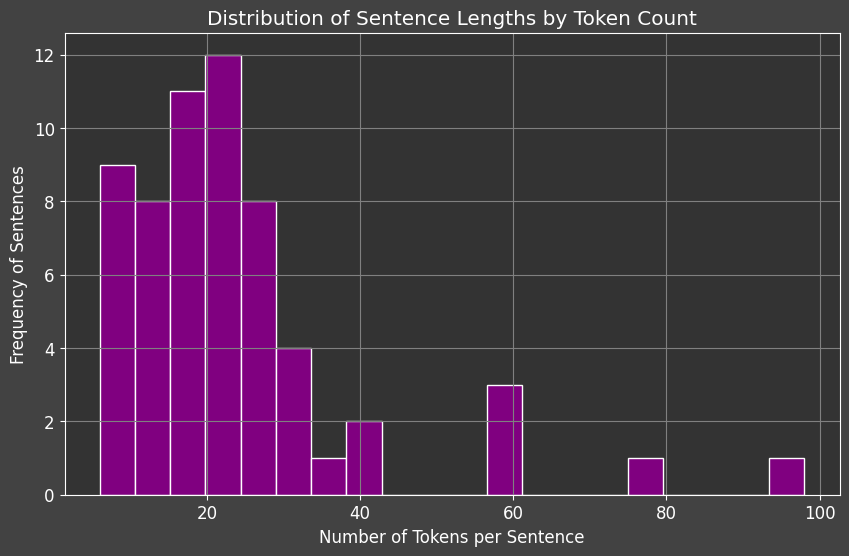

In [11]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib as mpl


# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list to hold sentence data and scores
sentence_scores = []

# Initialize a sentence counter
sentence_number = 1

# Tokenize into sentences and calculate score for each (score = number of tokens in the sentence)
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    sentence_scores.append([sentence_number, num_tokens])
    sentence_number += 1  # Increment the sentence counter

# Prepare and print the table using tabulate
print(tabulate(sentence_scores, headers=["Sentence Number", "Token Count"], tablefmt="grid"))

# Set style and font properties for the plot
mpl.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'axes.facecolor': '#333333',  # dark background for plot area
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#424242'  # dark background for figure background
})

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# List to hold scores (number of tokens in each sentence)
token_counts = []

# Tokenize into sentences and calculate token count for each
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    token_counts.append(num_tokens)

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=20, color='purple', edgecolor='white')  # Custom colors
plt.title('Distribution of Sentence Lengths by Token Count', color='white')
plt.xlabel('Number of Tokens per Sentence', color='white')
plt.ylabel('Frequency of Sentences', color='white')
plt.grid(True, color='gray')
plt.show()


Question 6:

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

+-------------------+---------------+
|   Sentence Number |   Lemma Count |
+===================+===============+
|                 1 |            87 |
+-------------------+---------------+
|                 2 |            46 |
+-------------------+---------------+
|                 3 |             6 |
+-------------------+---------------+
|                 4 |             6 |
+-------------------+---------------+
|                 5 |            56 |
+-------------------+---------------+
|                 6 |            10 |
+-------------------+---------------+
|                 7 |            11 |
+-------------------+---------------+
|                 8 |            17 |
+-------------------+---------------+
|                 9 |            14 |
+-------------------+---------------+
|                10 |             2 |
+-------------------+---------------+
|                11 |             4 |
+-------------------+---------------+
|                12 |            12 |
+-----------

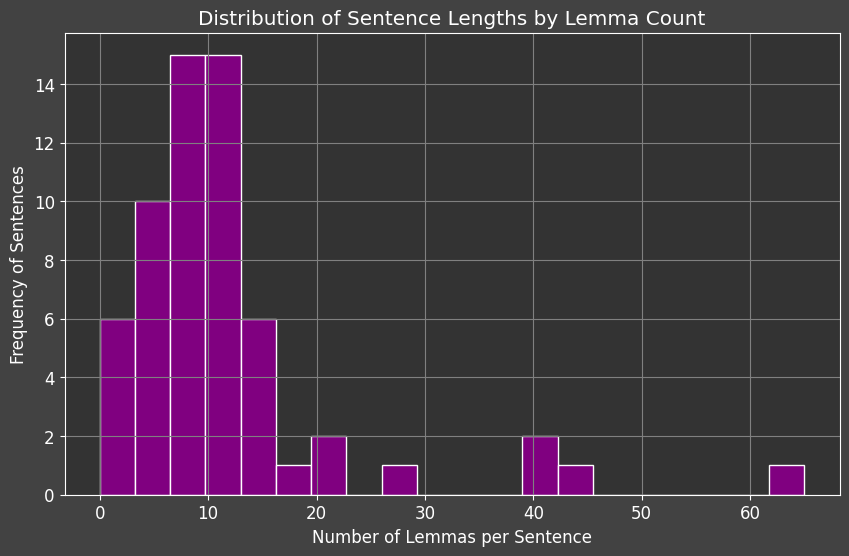

In [13]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib as mpl

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list to hold sentence data and scores
sentence_scores = []

# Initialize a sentence counter
sentence_number = 1

# Tokenize into sentences, process each sentence, and count the lemmas
for sent in doc.sents:
    # Generate a list of lemmas for each sentence, filtering out punctuation and spaces
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha and not token.is_stop]
    lemma_count = len(lemmas)
    sentence_scores.append([sentence_number, lemma_count])
    sentence_number += 1  # Increment the sentence counter

# Prepare and print the table using tabulate
print(tabulate(sentence_scores, headers=["Sentence Number", "Lemma Count"], tablefmt="grid"))

# For histogram 
# Set style and font properties for the plot
mpl.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'axes.facecolor': '#333333',  # dark background for plot area
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#424242'  # dark background for figure background
})

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# List to hold scores (number of lemmas in each sentence)
lemma_counts = []

# Tokenize into sentences and calculate lemma count for each
for sent in doc.sents:
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha and not token.is_stop]  # Get lemmas, exclude stopwords
    lemma_count = len(set(lemmas))  # Use a set to count unique lemmas if desired, or just len(lemmas) for total
    lemma_counts.append(lemma_count)

# Plotting the histogram of lemma counts
plt.figure(figsize=(10, 6))
plt.hist(lemma_counts, bins=20, color='purple', edgecolor='white')  # Custom colors
plt.title('Distribution of Sentence Lengths by Lemma Count', color='white')
plt.xlabel('Number of Lemmas per Sentence', color='white')
plt.ylabel('Frequency of Sentences', color='white')
plt.grid(True, color='gray')
plt.show()

Question 7:

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 55
* Cutoff Score (lemmas): 35

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Question 8:

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [14]:
import spacy
import textwrap

# Process the text with spaCy
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

# Given cutoff score for tokens
cutoff_score = 55

# Placeholder for the summary sentences
summary_sentences = []

# Loop through the sentences and collect those with token counts above the cutoff
# Stop after adding 6 sentences to the summary
for sent in doc.sents:
    if len(summary_sentences) < 6:  # Check if we already have 6 sentences
        token_count = len([token for token in sent if token.is_alpha])
        if token_count > cutoff_score:
            summary_sentences.append(sent.text.strip())
    else:
        break  # Exit the loop if we have reached 6 sentences

# Join the sentences to form the summary text
summary_text = ' '.join(summary_sentences)

# Wrap the summary text at 80 characters
wrapper = textwrap.TextWrapper(width=80)
wrapped_summary = wrapper.fill(text=summary_text)

print(wrapped_summary)

Homelessness in the U.S. hit a record high last year : NPR
Accessibility links  Skip to main content Keyboard shortcuts for audio player
Open Navigation Menu                           Newsletters     NPR Shop
Close Navigation Menu     Home    News Expand/collapse submenu for News
National World Politics Business Health Science Climate Race     Culture
Expand/collapse submenu for Culture   Books Movies Television Pop Culture Food
Art & Design  Performing Arts Life Kit Gaming     Music Expand/collapse submenu
for Music            Tiny Desk                Hip-Hop 50                All
Songs Considered                Music Features                Live Sessions
Podcasts & Shows Expand/collapse submenu for Podcasts & Shows   Daily
Morning Edition
Weekend Edition Saturday
Weekend Edition Sunday All Things Considered
Fresh Air
Up First                                    Featured            The NPR Politics
Podcast                 Throughline                 Trump's Trials
Pop Culture Happy Hou

Question 9:

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [16]:
from textblob import TextBlob
import nltk


summary = """Homelessness in the U.S. hit a record high last year : NPR
Accessibility links  Skip to main content Keyboard shortcuts for audio player
Open Navigation Menu                           Newsletters     NPR Shop
Close Navigation Menu     Home    News Expand/collapse submenu for News
National World Politics Business Health Science Climate Race     Culture
Expand/collapse submenu for Culture   Books Movies Television Pop Culture Food
Art & Design  Performing Arts Life Kit Gaming     Music Expand/collapse submenu
for Music            Tiny Desk                Hip-Hop 50                All
Songs Considered                Music Features                Live Sessions
Podcasts & Shows Expand/collapse submenu for Podcasts & Shows   Daily
Morning Edition
Weekend Edition Saturday
Weekend Edition Sunday All Things Considered
Fresh Air
Up First                                    Featured            The NPR Politics
Podcast                 Throughline                 Trump's Trials
Pop Culture Happy Hour        More Podcasts & Shows      Search     Newsletters
NPR Shop                         Tiny Desk                Hip-Hop 50
All Songs Considered                Music Features                Live Sessions
About NPR Diversity Organization NPR Network Support Careers Connect Press
Ethics      Homelessness in the U.S. hit a record high last year National
Homelessness in the U.S. hit a record high last year as pandemic aid ran out
Updated December 15, 20234:25 PM ET                      Originally published
December 15, 20232:01 PM ET                              Heard on
All Things Considered                         Jennifer Ludden
...
Facebook Instagram Press Public Editor Corrections Contact & Help    About NPR
Overview Diversity NPR Network Accessibility Ethics Finances    Get Involved
Support Public Radio Sponsor NPR NPR Careers NPR Shop NPR Events NPR Extra
Terms of Use Privacy Your Privacy Choices Text
"""

# Create a TextBlob object for the summary
blob = TextBlob(summary)

# Calculate the polarity score
polarity = blob.sentiment.polarity

# Print the polarity score with an appropriate label
if polarity > 0:
    print(f"Summary sentiment: Positive (Polarity Score: {polarity:.2f})")
elif polarity < 0:
    print(f"Summary sentiment: Negative (Polarity Score: {polarity:.2f})")
else:
    print(f"Summary sentiment: Neutral (Polarity Score: {polarity:.2f})")



Summary sentiment: Positive (Polarity Score: 0.15)


Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [17]:
import spacy
import textwrap

# Assume 'article_text' contains the full text of the article
# Process the text with spaCy
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

# Given cutoff score for lemmas
cutoff_score = 35

# Placeholder for the summary sentences
summary_sentences = []

# Loop through the sentences and collect those with lemma counts above the cutoff
# Stop after adding 6 sentences to the summary
for sent in doc.sents:
    if len(summary_sentences) < 6:  # Check if we already have 6 sentences
        # Get lemmas for the sentence, exclude punctuation, whitespace, and stopwords
        lemmas = [token.lemma_ for token in sent if token.is_alpha and not token.is_stop]
        lemma_count = len(set(lemmas))  # Count unique lemmas
        if lemma_count > cutoff_score:
            summary_sentences.append(sent.text.strip())
    else:
        break  # Exit the loop if we have reached 6 sentences

# Join the sentences to form the summary text
summary_text = ' '.join(summary_sentences)

# Wrap the summary text at 80 characters
wrapper = textwrap.TextWrapper(width=80)
wrapped_summary = wrapper.fill(text=summary_text)

print(wrapped_summary)

Homelessness in the U.S. hit a record high last year : NPR
Accessibility links  Skip to main content Keyboard shortcuts for audio player
Open Navigation Menu                           Newsletters     NPR Shop
Close Navigation Menu     Home    News Expand/collapse submenu for News
National World Politics Business Health Science Climate Race     Culture
Expand/collapse submenu for Culture   Books Movies Television Pop Culture Food
Art & Design  Performing Arts Life Kit Gaming     Music Expand/collapse submenu
for Music            Tiny Desk                Hip-Hop 50                All
Songs Considered                Music Features                Live Sessions
Podcasts & Shows Expand/collapse submenu for Podcasts & Shows   Daily
Morning Edition
Weekend Edition Saturday
Weekend Edition Sunday All Things Considered
Fresh Air
Up First                                    Featured            The NPR Politics
Podcast                 Throughline                 Trump's Trials
Pop Culture Happy Hou

Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [19]:
from textblob import TextBlob
import nltk

# Summary generated with lemma scores
summary = """Homelessness in the U.S. hit a record high last year : NPR
Accessibility links  Skip to main content Keyboard shortcuts for audio player
Open Navigation Menu                           Newsletters     NPR Shop
Close Navigation Menu     Home    News Expand/collapse submenu for News
National World Politics Business Health Science Climate Race     Culture
Expand/collapse submenu for Culture   Books Movies Television Pop Culture Food
Art & Design  Performing Arts Life Kit Gaming     Music Expand/collapse submenu
for Music            Tiny Desk                Hip-Hop 50                All
Songs Considered                Music Features                Live Sessions
Podcasts & Shows Expand/collapse submenu for Podcasts & Shows   Daily
Morning Edition
Weekend Edition Saturday
Weekend Edition Sunday All Things Considered
Fresh Air
Up First                                    Featured            The NPR Politics
Podcast                 Throughline                 Trump's Trials
Pop Culture Happy Hour        More Podcasts & Shows      Search     Newsletters
NPR Shop                         Tiny Desk                Hip-Hop 50
All Songs Considered                Music Features                Live Sessions
About NPR Diversity Organization NPR Network Support Careers Connect Press
Ethics      Homelessness in the U.S. hit a record high last year National
Homelessness in the U.S. hit a record high last year as pandemic aid ran out
Updated December 15, 20234:25 PM ET                      Originally published
December 15, 20232:01 PM ET                              Heard on
All Things Considered                         Jennifer Ludden
...
Editor Corrections Contact & Help    About NPR  Overview Diversity NPR Network
Accessibility Ethics Finances    Get Involved  Support Public Radio Sponsor NPR
NPR Careers NPR Shop NPR Events NPR Extra      Terms of Use Privacy Your Privacy
Choices Text
"""

# Create a TextBlob object for the summary
blob = TextBlob(summary)

# Calculate the polarity score
polarity = blob.sentiment.polarity

# Print the polarity score with an appropriate label
if polarity > 0:
    print(f"Summary sentiment: Positive (Polarity Score: {polarity:.2f})")
elif polarity < 0:
    print(f"Summary sentiment: Negative (Polarity Score: {polarity:.2f})")
else:
    print(f"Summary sentiment: Neutral (Polarity Score: {polarity:.2f})")


Summary sentiment: Positive (Polarity Score: 0.16)


Question 12:

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity of both summaries are basically the same which isn't very surprising because the summaries seemed almost identical. 

Question 13:

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Neither summary are good representations. I think this project was a good example of how to be more careful when choosing articles to summarize and using sentiment analysis on. This webpage was filled with ads and I think that dramatically effected my codes ability to read it. The summaries even are filled with basically filler text instead of any of the actual article itself which was disappointing. 